In [1]:
import numpy as num
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/HousingData.csv')
dataset.shape

(506, 14)

In [2]:
dataset.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [3]:
imputer = SimpleImputer(strategy='mean')
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)


In [4]:
dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

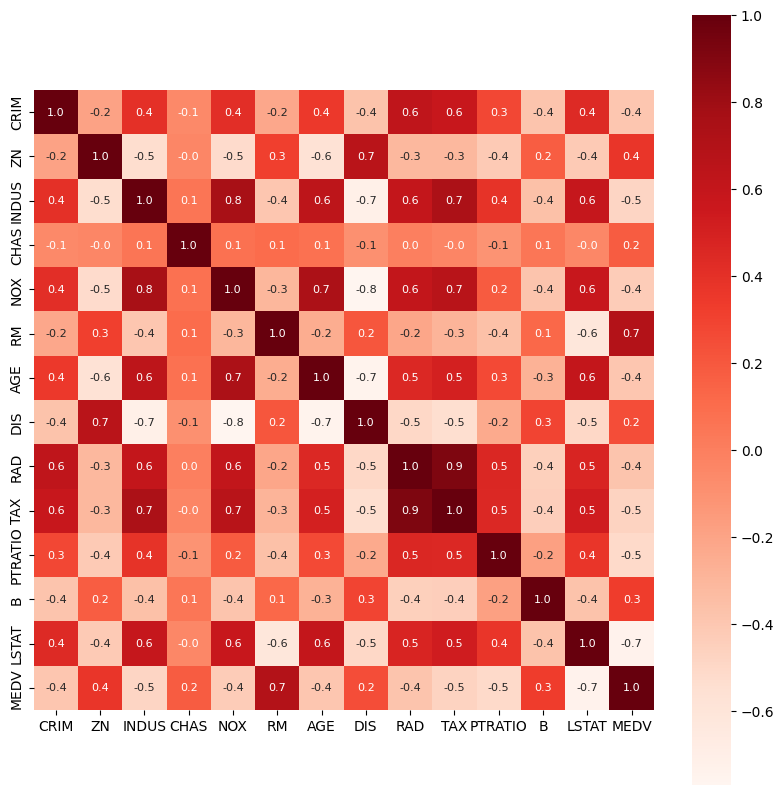

In [5]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [6]:
X = dataset_imputed.drop('MEDV', axis=1)
Y = dataset_imputed['MEDV']

In [7]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1.0,296.0,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2.0,242.0,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2.0,242.0,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3.0,222.0,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3.0,222.0,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1.0,273.0,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1.0,273.0,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1.0,273.0,21.0,393.45,6.480000


In [8]:
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=31)

In [10]:
print(X.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


In [11]:
print(X , x_train, x_test)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050  1.0  273.0   

     PTRATIO       B      LSTAT  
0    

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
model_prediction = model.predict(x_train)

In [14]:
model_prediction

array([33.38791177, 40.93052761, 10.05166052, 28.41767907, 19.55881627,
       19.1134937 , 19.0665082 , 36.61934589, 24.48889517, 21.09531996,
       19.65142746, 18.96537808, 14.69471784, 25.75916719, 32.41646608,
       18.95688134, 29.12873893,  1.10063087, 20.21997018, 25.69201759,
       31.27293954, 28.52957478, 12.91831273, 17.74079195, 15.90791968,
       27.73854204, 15.74064579,  3.39767879, 31.71535435, 16.20314546,
       15.65751354, 23.41376026, 25.1933531 , 30.36932091, 36.18687584,
       15.44242266, 13.18830916, 17.37605911, 40.83471669, 19.33818083,
       19.50848364, 27.06669805, 15.64589011, 44.92176258, 21.77675192,
       17.88290986, 18.04110996, 15.46814984, 20.68158046, 17.33275941,
       24.10688894, 25.83867076, 25.98304533, 14.37893253, 19.49363581,
       31.56549201, 26.7702103 , 36.09602548, 14.63254336, 12.80574129,
       40.44200606,  9.72793045, 27.19844607, 22.27662241, 28.49656005,
       17.10748893, 31.67658669, 30.85870681, 25.52908463, 20.81

In [15]:
score1 = metrics.r2_score(model_prediction, y_train)
print("R2 score = ",score1)

R2 score =  0.6091347581269485


In [16]:
score2 = metrics.mean_absolute_error(model_prediction, y_train)
print("Mean Absolute Error score = ",score2)

Mean Absolute Error score =  3.439043427089483


In [17]:
model2 = XGBRegressor()
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
model_prediction2 = model2.predict(x_train)
score1 = metrics.r2_score(model_prediction2, y_train)
print("R2 score = ",score1)

R2 score =  0.9999972427609102


In [19]:
 score2 = metrics.mean_absolute_error(model_prediction2, y_train)
print("Mean Absolute Error score = ",score2)

Mean Absolute Error score =  0.010395199237483553


In [20]:
input = num.array([[0.10959,	0.0,	11.93,  0.573,	6.794, 89.3,	2.3889, 1, 273, 21.0,	393.45, 6.48,	22.0]])
model2.predict(input)

array([34.192913], dtype=float32)

In [21]:
input = num.array([[0.10959,	0.0,	11.93,  0.573,	6.794, 89.3,	2.3889, 1, 273, 21.0,	393.45, 6.48,	22.0]])
model.predict(input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-12.27377967])

In [22]:
import pickle
pickle.dump(model,open("House_price_prediction.pk1","wb"))